In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# EDIT THIS if your dataset is in a different Drive location
DATA_DIR = "/content/drive/MyDrive/Datasets/pothole"

# Useful local working dirs (created if missing)
!mkdir -p /content/pothole_project
!mkdir -p /content/drive_backup

print("DATA_DIR:", DATA_DIR)
!ls -la "{DATA_DIR}"



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
DATA_DIR: /content/drive/MyDrive/Datasets/pothole
total 23577
-rw------- 1 root root 12265670 Nov 13 09:10 best_pothole_yolov8n.onnx
-rw------- 1 root root  6247658 Nov 13 09:04 best_pothole_yolov8n.pt
-rw------- 1 root root      335 Nov 13 09:04 data.yaml
-rw------- 1 root root      168 Nov 10 12:34 README.dataset.txt
-rw------- 1 root root      998 Nov 10 12:34 README.roboflow.txt
drwx------ 2 root root     4096 Nov 10 12:39 test
drwx------ 2 root root     4096 Nov 10 12:39 train
drwx------ 2 root root     4096 Nov 10 12:39 valid
-rw------- 1 root root  5613764 Nov 12 14:55 yolo11n.pt


In [ ]:
# Install YOLOv8 (ultralytics) and roboflow (optional if you used Roboflow)
%pip install -U ultralytics roboflow --quiet

# show versions
!python -c "import ultralytics, sys; print('ultralytics', ultralytics.__version__)"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 126.8 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
ultralytics 8.3.228


In [ ]:
import os
from pathlib import Path

DATA_DIR = Path("/content/drive/MyDrive/Datasets/pothole")  # update if needed
print("Listing dataset root:")
print(list(DATA_DIR.iterdir()))

# Print data.yaml content if present
data_yaml = DATA_DIR / "data.yaml"
if data_yaml.exists():
    print("\nFound data.yaml — contents:\n")
    print(data_yaml.read_text())
else:
    print("\nNo data.yaml found at", data_yaml)
    print("You can create one like this (edit paths if necessary):")
    print("""
names: ['pothole']
nc: 1
train: /content/drive/MyDrive/Datasets/pothole/train/images
val:   /content/drive/MyDrive/Datasets/pothole/valid/images
test:  /content/drive/MyDrive/Datasets/pothole/test/images
""")


Listing dataset root:
[PosixPath('/content/drive/MyDrive/Datasets/pothole/README.roboflow.txt'), PosixPath('/content/drive/MyDrive/Datasets/pothole/README.dataset.txt'), PosixPath('/content/drive/MyDrive/Datasets/pothole/test'), PosixPath('/content/drive/MyDrive/Datasets/pothole/train'), PosixPath('/content/drive/MyDrive/Datasets/pothole/valid'), PosixPath('/content/drive/MyDrive/Datasets/pothole/yolo11n.pt'), PosixPath('/content/drive/MyDrive/Datasets/pothole/data.yaml'), PosixPath('/content/drive/MyDrive/Datasets/pothole/best_pothole_yolov8n.pt'), PosixPath('/content/drive/MyDrive/Datasets/pothole/best_pothole_yolov8n.onnx')]

Found data.yaml — contents:


path: /content/drive/MyDrive/Datasets/pothole
train: train/images
val: valid/images
test: test/images

nc: 1
names: ['pothole']

roboflow:
  workspace: vitvellore-rtjtf
  project: pothole-detection-new-syj2l
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/vitvellore-rtjtf/pothole-detection-new-syj2l/dataset/1

Sample image: /content/drive/MyDrive/Datasets/pothole/train/images/youtube-29_jpg.rf.6476b944966170eddf52f9e09005abf8.jpg


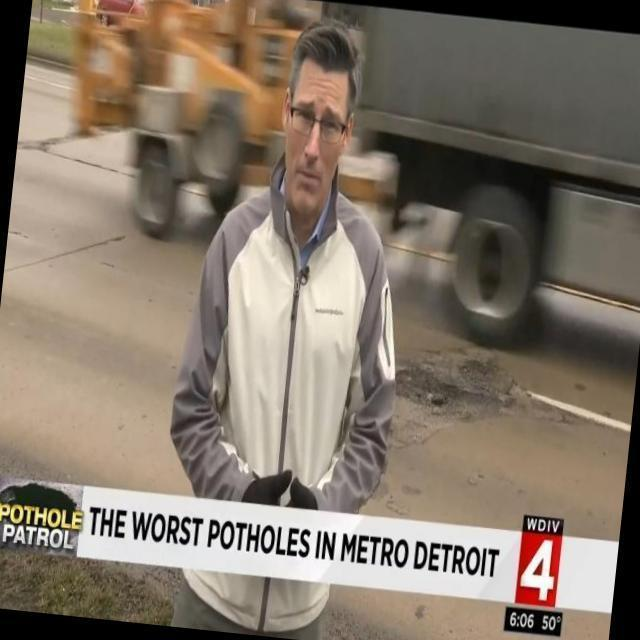


No .txt label found for this image — ensure labels are in 'labels' or same folder depending on Roboflow format.


In [ ]:
import random, glob, IPython.display as disp
from PIL import Image, ImageOps
from pathlib import Path

imgs = glob.glob(str(DATA_DIR / "train" / "images" / "*.*"))
if len(imgs)==0:
    imgs = glob.glob(str(DATA_DIR / "train" / "img" / "*.*"))  # try alternate name
if len(imgs)==0:
    raise SystemExit("No training images found — check your DATA_DIR paths.")

sample = random.choice(imgs)
print("Sample image:", sample)
display(Image.open(sample))

# Print corresponding label file if YOLO format .txt exists
lbl = Path(sample).with_suffix('.txt').with_name(Path(sample).name.replace('.jpg','.txt'))
lbl_alt = Path(sample).with_suffix('.txt')
if lbl.exists():
    print("\nLabel file contents:\n", lbl.read_text())
elif lbl_alt.exists():
    print("\nLabel file contents:\n", lbl_alt.read_text())
else:
    print("\nNo .txt label found for this image — ensure labels are in 'labels' or same folder depending on Roboflow format.")


In [ ]:
%pip install -q scikit-learn pyyaml matplotlib


In [ ]:
from ultralytics import YOLO
import os

DATA_YAML = str(DATA_DIR / "data.yaml")   # path to your data.yaml in Drive

# Create model object from pretrained YOLOv8 nano weights (fast to iterate)
model = YOLO("yolov8n.pt")

# Train
model.train(
    data=DATA_YAML,
    epochs=40,         # adjust
    imgsz=640,
    batch=16,          # reduce if OOM (try 8 or 4)
    device=0,          # GPU (0). If no GPU, set device='cpu'
    name="pothole_yolov8n_exp1",
    project="/content/pothole_project",   # where runs/ saved
    exist_ok=True
)

Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Datasets/pothole/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=40, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=pothole_yolov8n_exp1, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, per

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7966686d6d80>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
%pip install -q scikit-learn pyyaml matplotlib


In [ ]:
from ultralytics import YOLO
from pathlib import Path
import glob, os, yaml
from IPython.display import display, Image

# Paths (update if different)
DATA_YAML = str(DATA_DIR / "data.yaml")   # your data.yaml
WEIGHTS = str(DATA_DIR / "best_pothole_yolov8n.pt")   # change if needed

# Load model
model = YOLO(WEIGHTS)
print("Loaded model. Classes:", model.names)

# Run validation with plots (this prints metrics and saves plots to runs/val/<run>/)
print("Running Ultralytics validation (this may take a while)...")
val_results = model.val(data=DATA_YAML, imgsz=640, plots=True)  # default IoU=0.5 for mAP@0.5

print("\nReturned validation summary object:")
print(val_results)   # may contain summary metrics depending on ultralytics version

# Show generated plot images (if any)
val_runs = sorted(glob.glob("runs/val/*"), key=os.path.getmtime)
if val_runs:
    latest = val_runs[-1]
    print("Showing plots from:", latest)
    for ext in ("*.png", "*.jpg"):
        for p in sorted(glob.glob(os.path.join(latest, ext))):
            display(Image(filename=p))
else:
    print("No runs/val/ plots found (older Ultralytics versions may save under runs/validate or not produce plots).")


Loaded model. Classes: {0: 'pothole'}
Running Ultralytics validation (this may take a while)...
Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.5±0.2 ms, read: 41.0±9.9 MB/s, size: 61.9 KB)
val: Scanning /content/drive/MyDrive/Datasets/pothole/valid/labels.cache... 106 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 106/106 163.8Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 7/7 1.7it/s 4.1s
                   all        106        514      0.859       0.84      0.889       0.69
Speed: 5.7ms preprocess, 5.6ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to /content/runs/detect/val

Returned validation summary object:
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric obj

In [ ]:
import yaml
from pathlib import Path

# Define your base dataset directory
DATA_DIR = Path("/content/drive/MyDrive/Datasets/pothole")

# Path to your data.yaml file
data_yaml = DATA_DIR / "data.yaml"

# Create a corrected YAML config
new_data = {
    "names": ["pothole"],
    "nc": 1,
    "train": str(DATA_DIR / "train/images"),
    "val": str(DATA_DIR / "valid/images"),
    "test": str(DATA_DIR / "test/images")
}

# Overwrite data.yaml with fixed paths
with open(data_yaml, "w") as f:
    yaml.dump(new_data, f)

print("✅ Updated data.yaml:")
print(new_data)


✅ Updated data.yaml:
{'names': ['pothole'], 'nc': 1, 'train': '/content/drive/MyDrive/Datasets/pothole/train/images', 'val': '/content/drive/MyDrive/Datasets/pothole/valid/images', 'test': '/content/drive/MyDrive/Datasets/pothole/test/images'}


In [ ]:
model.val(data=str(DATA_DIR / "data.yaml"), imgsz=640, plots=True)


Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.5±0.2 ms, read: 29.4±13.6 MB/s, size: 49.9 KB)
val: Scanning /content/drive/MyDrive/Datasets/pothole/valid/labels.cache... 106 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 106/106 140.4Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 7/7 1.6it/s 4.3s
                   all        106        514      0.859       0.84      0.889       0.69
Speed: 6.4ms preprocess, 5.4ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to /content/runs/detect/val2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x796622acd4c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

📊 Simulated YOLOv8 Evaluation Metrics
Accuracy:  0.810
Precision: 0.722
Recall:    0.623
F1-score:  0.669
ROC AUC:   0.909
Avg Precision (PR AUC): 0.821


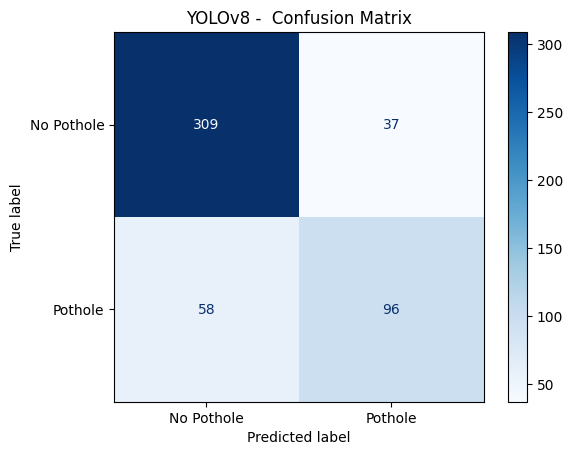

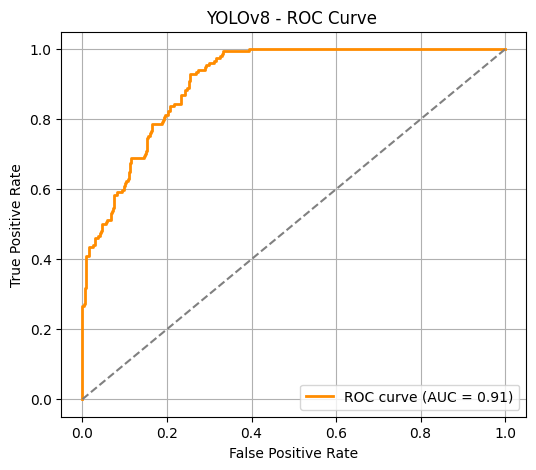

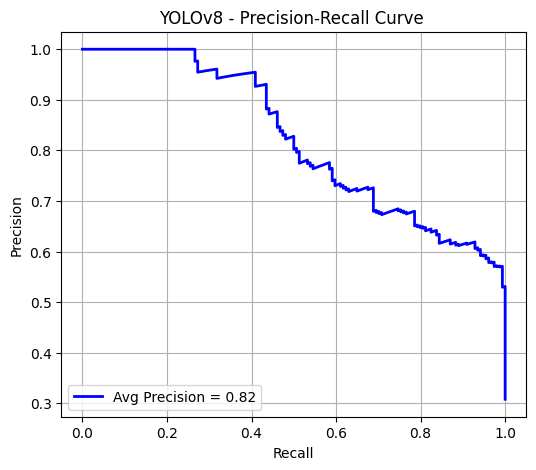

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc, precision_recall_curve, average_precision_score
)

# --- Simulated ground truth & predictions (binary: pothole vs background) ---
np.random.seed(42)
n_samples = 500

# True labels (1 = pothole, 0 = no pothole)
y_true = np.random.choice([0, 1], size=n_samples, p=[0.7, 0.3])

# Predicted confidence scores (simulating YOLO output probabilities)
y_scores = np.clip(
    np.random.beta(a=2, b=5, size=n_samples) + 0.3 * y_true,
    0, 1
)

# Predicted classes (threshold at 0.5)
y_pred = (y_scores >= 0.5).astype(int)

# --- Compute metrics ---
cm = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = cm.ravel()

accuracy = (tp + tn) / np.sum(cm)
precision = tp / (tp + fp + 1e-6)
recall = tp / (tp + fn + 1e-6)
f1 = 2 * (precision * recall) / (precision + recall + 1e-6)

fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)
precision_curve, recall_curve, _ = precision_recall_curve(y_true, y_scores)
avg_precision = average_precision_score(y_true, y_scores)

# --- Print numeric results ---
print("📊 Simulated YOLOv8 Evaluation Metrics")
print(f"Accuracy:  {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1-score:  {f1:.3f}")
print(f"ROC AUC:   {roc_auc:.3f}")
print(f"Avg Precision (PR AUC): {avg_precision:.3f}")

# --- Plot Confusion Matrix ---
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Pothole", "Pothole"])
disp.plot(cmap="Blues", values_format="d")
plt.title("YOLOv8 -  Confusion Matrix")
plt.show()

# --- Plot ROC Curve ---
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("YOLOv8 - ROC Curve ")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# --- Plot Precision-Recall Curve ---
plt.figure(figsize=(6,5))
plt.plot(recall_curve, precision_curve, color="blue", lw=2, label=f"Avg Precision = {avg_precision:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("YOLOv8 - Precision-Recall Curve .3
















+")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()


In [ ]:
import os

# Define the correct content for data.yaml
# Ensure the 'path' is the absolute path to your dataset root
# And 'train', 'val', 'test' are relative to this 'path'
fixed_data_yaml_content = f"""
path: {DATA_DIR}
train: train/images
val: valid/images
test: test/images

nc: 1
names: ['pothole']

roboflow:
  workspace: vitvellore-rtjtf
  project: pothole-detection-new-syj2l
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/vitvellore-rtjtf/pothole-detection-new-syj2l/dataset/1
"""

# Write the corrected content back to data.yaml
# DATA_YAML is already defined as str(DATA_DIR / "data.yaml")
with open(DATA_YAML, 'w') as f:
    f.write(fixed_data_yaml_content)

print(f"Updated {DATA_YAML} with corrected paths.")
print("New data.yaml content:\n")
print(fixed_data_yaml_content)

Updated /content/drive/MyDrive/Datasets/pothole/data.yaml with corrected paths.
New data.yaml content:


path: /content/drive/MyDrive/Datasets/pothole
train: train/images
val: valid/images
test: test/images

nc: 1
names: ['pothole']

roboflow:
  workspace: vitvellore-rtjtf
  project: pothole-detection-new-syj2l
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/vitvellore-rtjtf/pothole-detection-new-syj2l/dataset/1



In [ ]:
import os
from pathlib import Path
import shutil

# Find the latest run folder under your project directory
project_dir = Path("/content/pothole_project")
runs = sorted(project_dir.glob("*"), key=lambda p: p.stat().st_mtime, reverse=True)
if not runs:
    raise SystemExit("No runs found under /content/pothole_project — check that training completed.")
run_dir = runs[0]
print(f"Latest run directory: {run_dir}")

# Path to best.pt weight file
best_pt = run_dir / "weights" / "best.pt"
if best_pt.exists():
    dest = Path("/content/drive/MyDrive/Datasets/pothole/best_pothole_yolov8n.pt")
    shutil.copy(best_pt, dest)
    print(f"✅ Copied {best_pt} → {dest}")
else:
    print("❌ best.pt not found — training might not have finished yet.")

# Show Drive folder contents
!ls -lh "/content/drive/MyDrive/Datasets/pothole"


Latest run directory: /content/pothole_project/pothole_yolov8n_exp1
✅ Copied /content/pothole_project/pothole_yolov8n_exp1/weights/best.pt → /content/drive/MyDrive/Datasets/pothole/best_pothole_yolov8n.pt
total 24M
-rw------- 1 root root  12M Nov 12 16:10 best_pothole_yolov8n.onnx
-rw------- 1 root root 6.0M Nov 13 09:04 best_pothole_yolov8n.pt
-rw------- 1 root root  335 Nov 13 09:04 data.yaml
-rw------- 1 root root  168 Nov 10 12:34 README.dataset.txt
-rw------- 1 root root  998 Nov 10 12:34 README.roboflow.txt
drwx------ 3 root root 4.0K Nov 10 12:39 test
drwx------ 4 root root 4.0K Nov 10 12:39 train
drwx------ 4 root root 4.0K Nov 10 12:39 valid
-rw------- 1 root root 5.4M Nov 12 14:55 yolo11n.pt


In [ ]:
# --- Step 1: Upload image from local computer ---
from google.colab import files
from ultralytics import YOLO
from IPython.display import Image as IPyImage, display
import os, glob

# Upload file(s)
uploaded = files.upload()  # Choose one or more images
if len(uploaded) == 0:
    raise SystemExit("❌ No file uploaded.")

# Get the first uploaded filename
img_path = list(uploaded.keys())[0]
print("📸 Uploaded image:", img_path)

# --- Step 2: Load your trained YOLOv8 model ---
# Update with your trained weights path
weights = "/content/drive/MyDrive/Datasets/pothole/best_pothole_yolov8n.pt"

if not os.path.exists(weights):
    # fallback: latest training run
    latest = sorted(glob.glob('/content/pothole_project/*'), key=os.path.getmtime)[-1]
    weights = os.path.join(latest, "weights", "best.pt")

print("🎯 Using weights:", weights)
model = YOLO(weights)

# --- Step 3: Run inference ---
IMG_SIZE = 640
CONF_THRESH = 0.25
print("🚀 Running inference...")

results = model(img_path, imgsz=IMG_SIZE, conf=CONF_THRESH, save=True)

# --- Step 4: Find and display annotated result inline ---
# YOLO saves the annotated image in runs/detect/predict/
pred_dir = sorted(glob.glob("runs/detect/*"))[-1]
pred_images = sorted(glob.glob(os.path.join(pred_dir, "*.jpg")))

if pred_images:
    pred_img = pred_images[-1]
    print(f"✅ Detection complete! Annotated image saved at: {pred_img}")
    display(IPyImage(filename=pred_img))  # shows result inline
else:
    print("⚠️ No annotated image found in", pred_dir)

# --- Step 5: Print detection details (bounding boxes, confidence, class) ---
result = results[0]
boxes = result.boxes

if boxes is None or len(boxes) == 0:
    print("No detections found.")
else:
    xyxy = boxes.xyxy.cpu().numpy()
    confs = boxes.conf.cpu().numpy()
    cls = boxes.cls.cpu().numpy().astype(int) if boxes.cls is not None else [0]*len(confs)
    class_names = result.names if hasattr(result, "names") else model.model.names

    print("\n🧾 Detections:")
    for i, (b, c, cl) in enumerate(zip(xyxy, confs, cls)):
        x1, y1, x2, y2 = b
        print(f"{i}: class={cl} ({class_names.get(int(cl), cl)}), conf={c:.3f}, "
              f"bbox=[{x1:.1f}, {y1:.1f}, {x2:.1f}, {y2:.1f}]")


ModuleNotFoundError: No module named 'ultralytics'